In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [5]:
# Load the uploaded files to confirm access and peek at their contents
import pandas as pd
import os
# Read the merchandise CSV
merch_df = pd.read_csv('merchandise_values_annual_dataset.csv', encoding='ISO-8859-1')

print(merch_df.head())



file_path = "paste.txt"  # or the absolute path

if os.path.exists(file_path):
    with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
        paste_text = f.read()
else:
    paste_text = ""
    print("paste.txt not found, skipping paste_text load")

          IndicatorCategory IndicatorCode  \
0  Merchandise trade values    ITS_MTV_AM   
1  Merchandise trade values    ITS_MTV_AM   
2  Merchandise trade values    ITS_MTV_AM   
3  Merchandise trade values    ITS_MTV_AM   
4  Merchandise trade values    ITS_MTV_AM   

                                       Indicator ReporterCode ReporterISO3A  \
0  Merchandise imports by product group - annual          533           ABW   
1  Merchandise imports by product group - annual          320           GTM   
2  Merchandise imports by product group - annual          528           NLD   
3  Merchandise imports by product group - annual          296           KIR   
4  Merchandise imports by product group - annual          624           GNB   

                             Reporter PartnerCode PartnerISO3A Partner  \
0  Aruba, Netherlands with respect to         000          NaN   World   
1                           Guatemala         000          NaN   World   
2                         Nether

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9980\1919925437.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  merch_df = pd.read_csv('merchandise_values_annual_dataset.csv', encoding='ISO-8859-1')


In [19]:
merch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231924 entries, 0 to 231923
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   IndicatorCategory          231924 non-null  object
 1   IndicatorCode              231924 non-null  object
 2   Indicator                  231924 non-null  object
 3   ReporterCode               231924 non-null  object
 4   ReporterISO3A              222189 non-null  object
 5   Reporter                   231924 non-null  object
 6   PartnerCode                231924 non-null  object
 7   PartnerISO3A               866 non-null     object
 8   Partner                    231924 non-null  object
 9   ProductClassificationCode  231924 non-null  object
 10  ProductClassification      231924 non-null  object
 11  ProductCode                231924 non-null  object
 12  Product                    231924 non-null  object
 13  PeriodCode                 231924 non-null  

In [21]:
# This cell inspects the existing dataframe structure (assuming it's already loaded as merch_df)
# and demonstrates how to handle null values sensibly in key columns, without re-loading from disk.

import pandas as pd

# Show basic null counts for reference
null_counts = merch_df.isna().sum()
print(null_counts)

# Ensure Value is numeric and create a filled version treating missing as 0 for safe aggregations
merch_df['Value'] = pd.to_numeric(merch_df['Value'], errors='coerce')
merch_df['Value_filled'] = merch_df['Value'].fillna(0)

# Example: drop rows where essential identifiers are missing
essential_cols = ['Reporter', 'Partner', 'ProductCode', 'Year']
clean_df = merch_df.dropna(subset=essential_cols)

print(clean_df.head())

IndicatorCategory                 0
IndicatorCode                     0
Indicator                         0
ReporterCode                      0
ReporterISO3A                  9735
Reporter                          0
PartnerCode                       0
PartnerISO3A                 231058
Partner                           0
ProductClassificationCode         0
ProductClassification             0
ProductCode                       0
Product                           0
PeriodCode                        0
Period                            0
FrequencyCode                     0
Frequency                         0
UnitCode                          0
Unit                              0
Year                              0
ValueFlagCode                220126
ValueFlag                    220126
Value                             0
dtype: int64
          IndicatorCategory IndicatorCode  \
0  Merchandise trade values    ITS_MTV_AM   
1  Merchandise trade values    ITS_MTV_AM   
2  Merchandise trade val

In [7]:
# Assume merch_df is already in memory from earlier

# Basic cleaning: ensure column names are consistent
merch_df.columns = [c.strip() for c in merch_df.columns]

In [8]:
# 1) Summaries: total values by Reporter (country), Year, and Product section (Product)
summary_country_year_product = merch_df.groupby(['Reporter', 'Year', 'Product'], as_index=False)['Value'].sum()
print(summary_country_year_product.head())

      Reporter  Year            Product  Value
0  Afghanistan  1948  Total merchandise    107
1  Afghanistan  1949  Total merchandise     99
2  Afghanistan  1950  Total merchandise    113
3  Afghanistan  1951  Total merchandise    115
4  Afghanistan  1952  Total merchandise    105


In [9]:
# 2) Top 5 product sections globally (by total Value across all years/countries)
global_product_totals = merch_df.groupby('Product', as_index=False)['Value'].sum().sort_values('Value', ascending=False)
print(global_product_totals.head())


                              Product       Value
16                  Total merchandise  7207048509
11                       Manufactures  1537216353
10  Machinery and transport equipment   756769608
7           Fuels and mining products   354761583
6                               Fuels   260895522


In [12]:
# For India: filter Reporter == 'India' or ISO code 'IND'
india_df = merch_df[(merch_df['Reporter'] == 'India') | (merch_df['ReporterISO3A'] == 'IND')]
india_product_totals = india_df.groupby('Product', as_index=False)['Value'].sum().sort_values('Value', ascending=False)
print(india_product_totals.head())

                              Product     Value
16                  Total merchandise  15915479
11                       Manufactures   7902265
7           Fuels and mining products   4461915
6                               Fuels   3666282
10  Machinery and transport equipment   2598754


In [13]:
# 3) CAGR of India exports 2015-2022.
# Need to infer exports: Indicator might contain 'exports'. Filter accordingly.
india_exports = merch_df[(merch_df['Indicator'].str.contains('exports', case=False, na=False)) & ((merch_df['Reporter'] == 'India') | (merch_df['ReporterISO3A'] == 'IND'))]
india_exports_by_year = india_exports.groupby('Year', as_index=False)['Value'].sum().sort_values('Year')
print(india_exports_by_year)


    Year    Value
0   1948     1295
1   1949     1197
2   1950     1145
3   1951     1602
4   1952     1243
..   ...      ...
72  2020   820574
73  2021  1164296
74  2022  1349161
75  2023  1309842
76  2024   442600

[77 rows x 2 columns]


In [14]:
# Filter 2015 and 2022 if present
start_year = 2015
end_year = 2022
start_val = india_exports_by_year.loc[india_exports_by_year['Year'] == start_year, 'Value']
end_val = india_exports_by_year.loc[india_exports_by_year['Year'] == end_year, 'Value']

if not start_val.empty and not end_val.empty:
    n_years = end_year - start_year
    cagr = (end_val.values[0] / start_val.values[0]) ** (1.0 / n_years) - 1.0
else:
    cagr = None

print(cagr)

0.08506094189422586


In [15]:
# 4) Country with highest imports from India in 2022
# Interpret as: partner receiving India's exports in 2022
india_exports_2022 = india_exports[india_exports['Year'] == 2022]
imports_from_india_2022 = india_exports_2022.groupby('Partner', as_index=False)['Value'].sum().sort_values('Value', ascending=False)
print(imports_from_india_2022.head())

  Partner    Value
0   World  1349161


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9980\2515339530.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  india_machinery = india_exports[machinery_mask & india_exports['Year'].between(2015, 2022)]


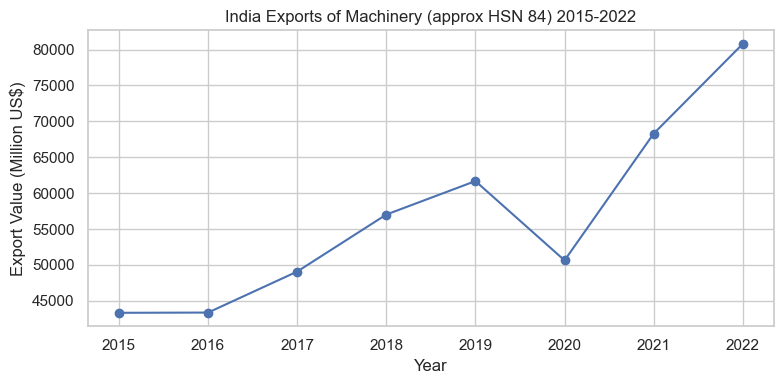

In [16]:
# 5) Charts for India
sns.set(style='whitegrid')

# Line chart for Machinery (HSN 84) exports 2015-2022
# We may not have HSN codes directly; product code might be '84' or product text contains 'Machinery' and '84'.
machinery_mask = (merch_df['ProductCode'].astype(str).str.contains('84')) | (merch_df['Product'].str.contains('Machinery', case=False, na=False))
india_machinery = india_exports[machinery_mask & india_exports['Year'].between(2015, 2022)]
india_machinery_year = india_machinery.groupby('Year', as_index=False)['Value'].sum().sort_values('Year')

plt.figure(figsize=(8,4))
plt.plot(india_machinery_year['Year'], india_machinery_year['Value'], marker='o')
plt.title('India Exports of Machinery (approx HSN 84) 2015-2022')
plt.xlabel('Year')
plt.ylabel('Export Value (Million US$)')
plt.tight_layout()
plt.show()

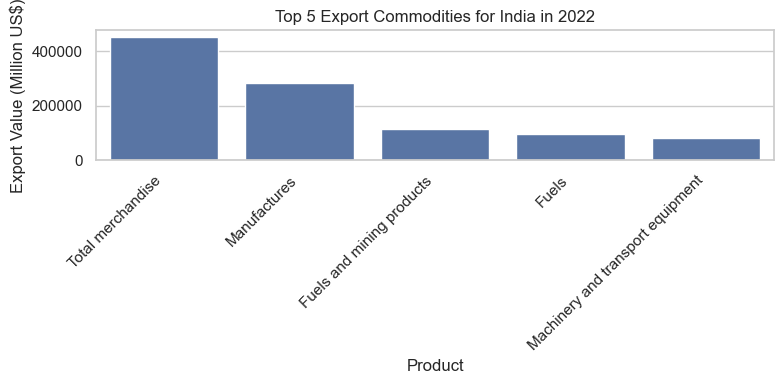

In [17]:
# Bar chart of top 5 export commodities for India in 2022
india_exports_2022_by_product = india_exports[india_exports['Year'] == 2022].groupby('Product', as_index=False)['Value'].sum().sort_values('Value', ascending=False).head(5)

plt.figure(figsize=(8,4))
sns.barplot(data=india_exports_2022_by_product, x='Product', y='Value')
plt.title('Top 5 Export Commodities for India in 2022')
plt.xlabel('Product')
plt.ylabel('Export Value (Million US$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Filter to India exports and machinery-like products
merch_df.columns = [c.strip() for c in merch_df.columns]
mask_india = (merch_df['Reporter'] == 'India') | (merch_df['ReporterISO3A'] == 'IND')
mask_export = merch_df['Indicator'].str.contains('export', case=False, na=False)
mask_mach = merch_df['Product'].str.contains('Machinery', case=False, na=False)
india_mach = merch_df[mask_india & mask_export & mask_mach].copy()

# Aggregate by year
ts = india_mach.groupby('Year', as_index=False)['Value'].sum().sort_values('Year')
print(ts.head())

# Set Year as index with a DateTime-like index for plotting
series = ts.set_index('Year')['Value']

   Year  Value
0  1990   1332
1  1991   1347
2  1992   1454
3  1993   1516
4  1994   1893


In [26]:
# Fit Holt-Winters exponential smoothing with trend
model = ExponentialSmoothing(series, trend='add', seasonal=None, initialization_method='estimated')
fit = model.fit()
fit

D:\DA\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\DA\ANACONDA\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [27]:
# Forecast next 3 years
forecast_horizon = 3
future_index = range(series.index.max() + 1, series.index.max() + 1 + forecast_horizon)
forecast_vals = fit.forecast(forecast_horizon)

print(forecast_vals)

34     94708.473809
35    100346.410102
36    105984.346396
dtype: float64


D:\DA\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\DA\ANACONDA\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


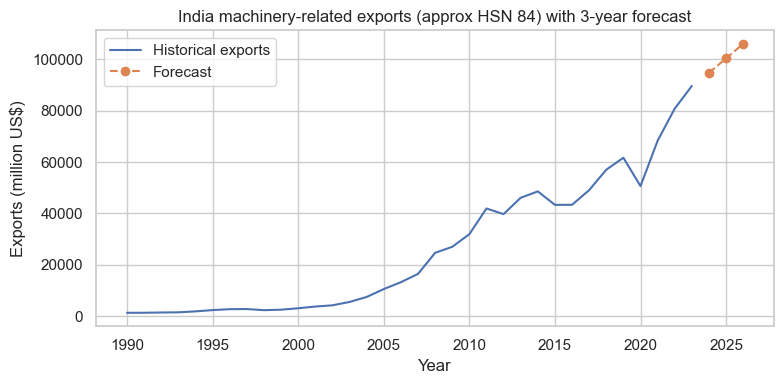

In [28]:
# Plot history + forecast
plt.figure(figsize=(8,4))
plt.plot(series.index, series.values, label='Historical exports')
plt.plot(future_index, forecast_vals.values, label='Forecast', marker='o', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Exports (million US$)')
plt.title('India machinery-related exports (approx HSN 84) with 3-year forecast')
plt.legend()
plt.tight_layout()
plt.show()